In [1]:
import pandas as pd
import seaborn as sns
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile for later use

# Parks Data

In [2]:
park1 = pd.read_csv("parks1.csv")
# parks data from the WPRDC

In [3]:
park1.columns
#see what columns I want to keep

Index(['objectid_1', 'objectid', 'acreage', 'sqft', 'final_cat', 'type',
       'sector', 'origpkname', 'updatepknm', 'alterntnam', 'divname',
       'shape_leng', 'globalid', 'created_user', 'created_date',
       'last_edited_user', 'last_edited_date', 'maintenanceresponsibility',
       'dpw_ac', 'globalid_1', 'shape_area', 'shape_length'],
      dtype='object')

In [4]:
park1 = park1[['objectid','sqft','origpkname','updatepknm','alterntnam']]

<AxesSubplot:>

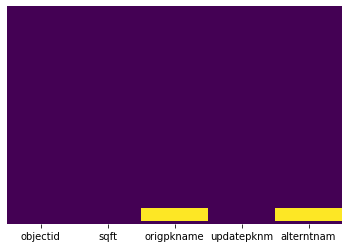

In [5]:
sns.heatmap(park1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# use heatmap to see what data I am missing

In [6]:
park1.dropna(inplace=True)
# dropping all NaN values 

In [7]:
park1 = park1[["sqft","updatepknm"]]
park1.rename(columns = {"updatepknm":"name"},inplace = True)

In [8]:
park1

sqft                             name
0    4.177537e+04               August Wilson Park
1    8.973835e+04                 Young Field Park
2    2.041572e+04  Roland Lockridge Community Park
3    8.517818e+04                  Friendship Park
4    2.225066e+05                      Heth's Park
..            ...                              ...
197  1.717911e+06                   Fairhaven Park
198  3.494049e+06                 Seldom Seen Park
199  1.450462e+06                     Bigelow Park
213  6.072921e+06                   Hazelwood Park
214  1.859561e+05                    Homewood Park

[202 rows x 2 columns]

In [9]:
park2 = pd.read_csv("parks2.csv")
# need park data with neighborhood attached

In [10]:
park2.head()

id                     name  type maintenance_responsibility  \
0  2111959181           Able Long Park  Park           Parks - Southern   
1  1109513049  Albert Turk Graham Park  Park           Parks - Schenley   
2  1544096765               Alcoa Park  Park           Parks - Northern   
3  1212681573        Allegheny Commons  Park           Parks - Northern   
4   954863286   Allegheny Landing Park  Park           Parks - Northern   

                                               image      neighborhood  \
0  https://tools.wprdc.org/images/pittsburgh/park...         Beechview   
1  https://tools.wprdc.org/images/pittsburgh/park...  Crawford-Roberts   
2                                                NaN       North Shore   
3                                                NaN  Allegheny Center   
4                                                NaN       North Shore   

   council_district  ward        tract  public_works_division  pli_division  \
0                 4    19  42003192000                      5            19   
1                 6     3  42003030500                      3             3   
2                 1    22  42003563200                      6            22   
3                 1    22  42003562700                      1            22   
4                 1    22  42003563200                      6            22   

   police_zone fire_zone   latitude  longitude  
0            6      4-28  40.408118 -80.028197  
1            2       2-1  40.440507 -79.984018  
2            1      1-20  40.447481 -80.001017  
3            1       1-7  40.453126 -80.009158  
4            1      1-20  40.447184 -80.002907

In [11]:
park2 = park2[["name","neighborhood"]]

In [12]:
parks = park1.merge(park2,how='outer',on= "name")
# merging the datasets on the park name 

<AxesSubplot:>

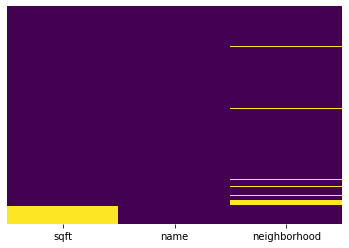

In [13]:
sns.heatmap(parks.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
parks.dropna(inplace=True)
# dropping all parks with missing values

In [15]:
parks = pd.DataFrame(parks.groupby(by='neighborhood')['sqft'].sum().sort_values(ascending = False))
# creating frame for aggregating sqft of parks per neighborhood

In [16]:
parks.head()

sqft
neighborhood                     
Squirrel Hill South  4.542749e+07
Highland Park        1.668423e+07
Perry North          1.133439e+07
Brookline            4.779746e+06
Beltzhoover          3.483008e+06

In [17]:
park_map = neighborhoods.merge(parks, how='left', left_on='hood', right_on='neighborhood')

<AxesSubplot:>

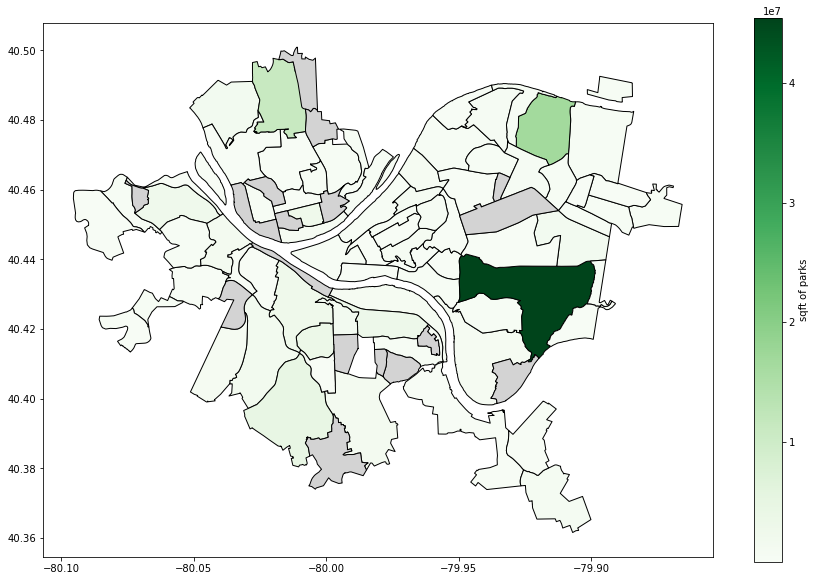

In [18]:
park_map.plot(column='sqft', # set the data to be used for coloring
       cmap='Greens',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "sqft of parks"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

In [19]:
# this map shows the total sqft of parks per neighborhood

# Population

In [20]:
pop = pd.read_csv("population-density.csv")

In [21]:
pop.columns

Index(['Neighborhood', 'Sector #', 'Pop. 1940', 'Pop. 1950', 'Pop. 1960',
       'Pop. 1970', 'Pop. 1980', 'Pop. 1990', 'Pop. 2000', 'Pop. 2010',
       '% Pop. Change, 60-70', '% Pop. Change, 70-80', '% Pop. Change, 80-90',
       '% Pop. Change, 90-00', '% Pop. Change, 00-10',
       'Pop. as % of City total (2010)', 'Land Area (sq. mi)',
       'Land Area (acres)', 'Persons / sq. mi (2010)',
       'Persons / sq. mi (2000)', 'Persons / acre (2010)',
       'Persons / acre (2000)', '% African American (2010)', '% Asian (2010)',
       '% Other (2010)', '% White (2010)', '% 2+ Races (2010)',
       '% Hispanic (of any race) (2010)', '% Pop. Age < 5 (2010)',
       '% Pop. Age 5-19 (2010)', '% Pop. Age 20-34 (2010)',
       '% Pop. Age 35-59 (2010)', '% Pop. Age 60-74 (2010)',
       '% Pop. Age > 75 (2010)'],
      dtype='object')

In [22]:
pop = pop[['Neighborhood','Persons / sq. mi (2010)','Land Area (sq. mi)']]
pop.rename(columns = {"Persons / sq. mi (2010)":"person_sqmi",'Land Area (sq. mi)':'sqmi'}, inplace = True)
pop.columns = pop.columns.str.lower()
pop["person_sqmi"]=pop["person_sqmi"].str.replace(",","").astype(float)

<AxesSubplot:ylabel='neighborhood'>

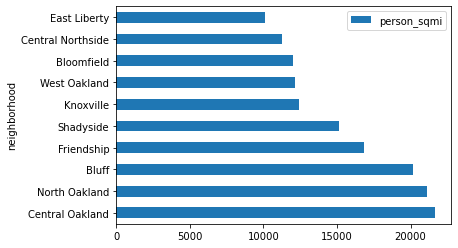

In [55]:
pop[["neighborhood","person_sqmi"]].sort_values("person_sqmi", ascending = False).head(10).plot(x="neighborhood", y=["person_sqmi"], kind="barh")


In [24]:
pop_map = neighborhoods.merge(pop, how='left', left_on='hood', right_on='neighborhood')

In [25]:
pop_map.plot(column='person_sqmi', # set the data to be used for coloring
       cmap='Blues',              # choose a color palette
       edgecolor="black",        # outline the districts 
       #legend=True,              # show the legend
       #legend_kwds={'label': "person_sqmi"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

<AxesSubplot:>

# Road Data

In [26]:
# A lot of the road data that I found was difficult to work with so I chose to combine total signed intersectrions

In [27]:
cross = pd.read_csv("crosswalks.csv")

In [28]:
cross.head()

id                   type           street inactive  \
0  1559483633      Crosswalk - Other      ELEVENTH ST        f   
1   785965942  Crosswalk - Two Lined         PENN AVE        f   
2  2008474459  Crosswalk - Two Lined  MORNINGSIDE AVE        f   
3  1207933462  Crosswalk - Two Lined          TECH ST        f   
4   905740180  Crosswalk - Two Lined          FREW ST        f   

                neighborhood  council_district  ward        tract  \
0  Central Business District               6.0   2.0  42003020100   
1             Strip District               7.0   2.0  42003020300   
2                Morningside               7.0  10.0  42003101400   
3        Squirrel Hill North               8.0  14.0  42003140100   
4        Squirrel Hill South               5.0  14.0  42003980500   

   public_works_division  pli_division  police_zone fire_zone   latitude  \
0                    6.0           2.0          2.0       2-3  40.444989   
1                    6.0           2.0          2.0       2-3  40.445717   
2                    2.0          10.0          5.0       3-7  40.479579   
3                    3.0          14.0          4.0       2-8  40.440528   
4                    3.0          14.0          4.0       2-8  40.440468   

   longitude  
0 -79.993884  
1 -79.992465  
2 -79.930685  
3 -79.942126  
4 -79.942267

In [29]:
total_walks = pd.DataFrame(cross.value_counts("neighborhood"))

In [30]:
total_walks.head(10).plot(kind="barh")

<AxesSubplot:ylabel='neighborhood'>

In [31]:
signs = pd.read_csv("traffic_signs.csv")
# all marked intersections

In [32]:
print(len(signs))
signs.head()

74711


id mutcd_code address_number          street        city  \
0  1673225887       R1-1            900  California Ave  Pittsburgh   
1   668379452       R1-1            107     Glenbury St  Pittsburgh   
2   174468442       R1-1           5325      Forbes Ave  Pittsburgh   
3  1517107112       R1-1           1437   N St Clair St  Pittsburgh   
4  1374142598         WF            228     Isabella St  Pittsburgh   

  mounting_fixture date_installed         description          neighborhood  \
0        Wood Pole            NaN                Stop  California-Kirkbride   
1          Channel            NaN                Stop             Overbrook   
2        Wood Pole            NaN                Stop   Squirrel Hill North   
3          Channel            NaN                Stop         Highland Park   
4       Metal Pole     1995-02-14  Wayfinding Signage           North Shore   

   council_district  ward         tract  public_works_division  pli_division  \
0               6.0  25.0  4.200325e+10                    1.0          25.0   
1               4.0  32.0  4.200332e+10                    5.0          32.0   
2               8.0  14.0  4.200314e+10                    3.0          14.0   
3               7.0  11.0  4.200311e+10                    2.0          11.0   
4               1.0  22.0  4.200356e+10                    6.0          22.0   

   police_zone fire_zone   latitude  longitude  
0          1.0       1-9  40.459325 -80.019057  
1          3.0      4-25  40.386955 -80.002161  
2          4.0       2-8  40.439828 -79.934814  
3          5.0       3-9  40.478685 -79.919270  
4          1.0      1-20  40.448482 -80.000671

In [33]:
total_signs = pd.DataFrame(signs.value_counts("neighborhood"))

In [34]:
total_signs.head(10).plot(kind="barh")

<AxesSubplot:ylabel='neighborhood'>

In [35]:
road = total_walks.merge(total_signs, on = "neighborhood")
#combine traffic data with population data

In [36]:
road["sign_walks"] = road["0_x"]+road["0_y"]
road = road[["sign_walks"]]

<AxesSubplot:ylabel='neighborhood'>

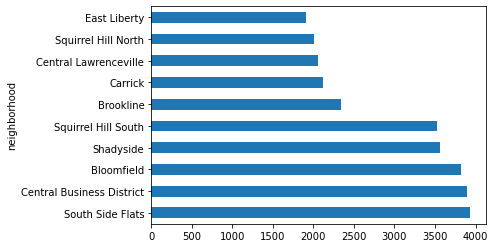

In [37]:
road["sign_walks"].sort_values(ascending = False).head(10).plot(kind = "barh")

In [38]:
road_map = neighborhoods.merge(road, how='left', left_on='hood', right_on='neighborhood')

In [39]:
road_map.plot(column='sign_walks', # set the data to be used for coloring
       cmap='Reds',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "sqft of parks"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

<AxesSubplot:>

# Tree Data

In [40]:
trees = pd.read_csv("trees.csv", low_memory=False)

Next I want to sum how many trees are in each neighborhood so I add a value of 1 to each individual tree then group them by neighborhood and sum the values.

In [41]:
trees['num'] =1
num_trees = trees.groupby("neighborhood").sum()['num']
num_trees.sort_values(ascending=False)

neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
Glen Hazel                2
South Shore               2
Hays                      1
Name: num, Length: 90, dtype: int64

After this we need to get some additional information about the neighborhoods so lets read some more files

In [42]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
nbhds = geopandas.read_file("Neighborhoods/Neighborhoods_.dbf") 

Okay awesome now we have access to information about the neighborhoods and their shape, so lets see how big each area is

In [43]:
sqmiles = nbhds.groupby('hood').sum()['sqmiles']
#perry was not in data so we add it ourselves 
sqmiles['Perry North'] = 1.212
sqfeet = sqmiles * 3057.4132457

Now we want to see how many trees there are per square mile of a given neighborhood and we can do so like this:

In [44]:
for index, value in num_trees.items():
    num_trees[index] = (num_trees[index]*10)/(sqmiles[index] *10)

Okay awesome now lets plot this data 

In [45]:
num_trees.sort_values(ascending=False)
num_trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='neighborhood')
num_trees_map.plot(column='num', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "trees per square mile"}, # label the legend
               figsize = (15,10)    # set the size
                # set disctricts with no data to gray
               )

<AxesSubplot:>

Okay this is pretty cool, but is the number of trees really the only relvant metric? Lets look at the size of these trees

<AxesSubplot:>

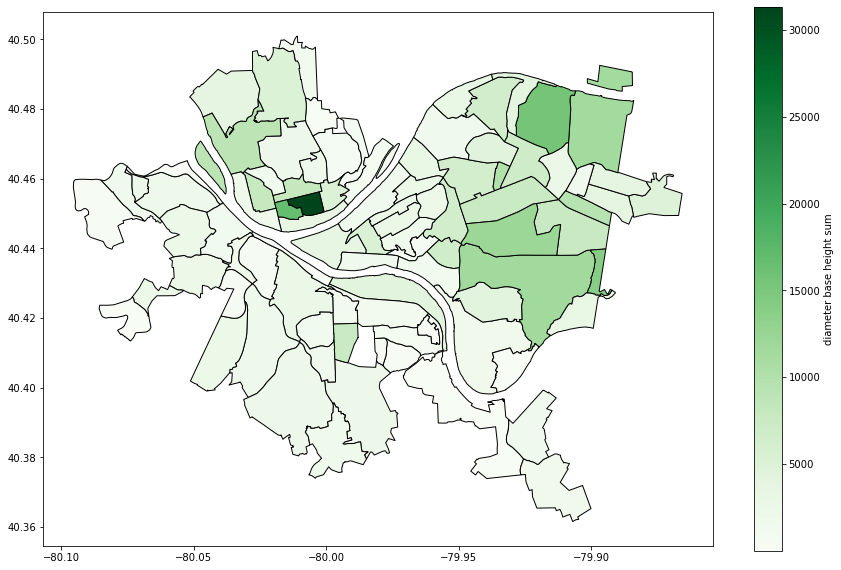

In [46]:
tree_den = trees.groupby("neighborhood").sum()['diameter_base_height']
tree_den.sort_values(ascending=False)
for index, value in tree_den.items():
    tree_den[index] = ((tree_den[index]/2.54)*10)/(sqmiles[index] *10)
tree_den.sort_values(ascending=False)

tree_den_map = neighborhoods.merge(tree_den, how='left', left_on='hood', right_on='neighborhood')

tree_den_map.plot(column='diameter_base_height', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "diameter base height sum"}, # label the legend
                figsize = (15,10)# set the size
                # set disctricts with no data to gray
               )

Well, that looks good, but I dont think summing the total diameters of all the trees in a neighborhood is the best metric, so lets finish this by calculating the area of all the trees in a neighborhood relative to the area of that neighborhood

<AxesSubplot:>

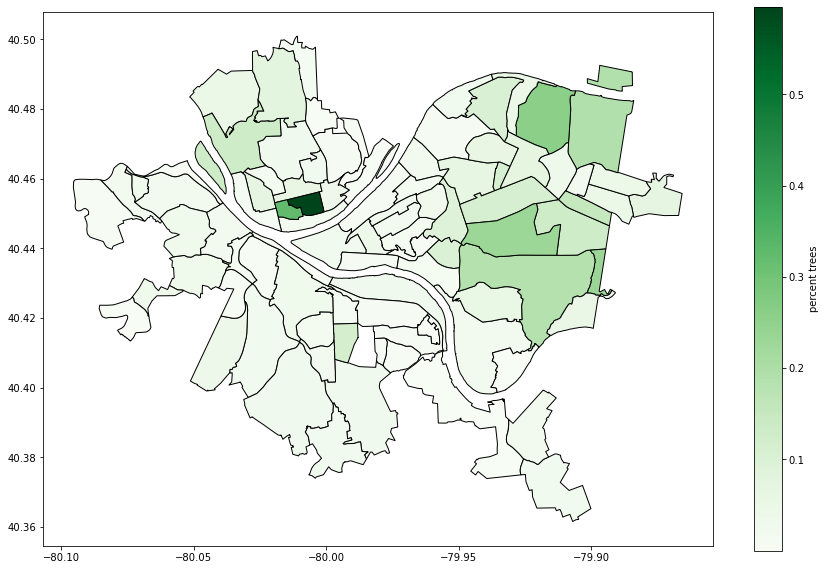

In [47]:
trees['tree_area_feet'] = ((((trees['diameter_base_height']/2.54)/2)**2)* 3.14159)/144
tree_area_sum = trees.groupby("neighborhood").sum()['tree_area_feet']
percent_tree =  tree_area_sum /sqfeet 
for index, value in tree_area_sum.items():
    tree_area_sum[index] = tree_area_sum[index]/sqfeet[index]
percent_tree.sort_values(ascending = False)

percent_tree_map = neighborhoods.merge(tree_area_sum, how='left', left_on='hood', right_on='neighborhood')

percent_tree_map.plot(column='tree_area_feet', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "percent trees"}, # label the legend
               figsize = (15,10),# set the size
                # set disctricts with no data to gray
               )

okay this is awesome lets normaizle this so we can combine it with other data

# Combining Data

In [48]:
frame = pop.merge(road, on = "neighborhood")
frame = frame.merge(parks, on = "neighborhood")
frame = frame.merge(tree_area_sum, on = "neighborhood")

In [49]:
frame.head()

neighborhood  person_sqmi  sqmi  sign_walks          sqft  \
0   Allegheny Center       4442.9   0.2         639  2.783957e+06   
1          Allentown       8474.6   0.3         599  1.433968e+06   
2          Arlington       3976.6   0.5         354  2.529969e+05   
3         Banksville       4276.6   1.0         374  8.368560e+05   
4  Bedford Dwellings       6715.1   0.2         137  3.520345e+05   

   tree_area_feet  
0        0.595828  
1        0.012053  
2        0.008134  
3        0.040398  
4        0.029208

In [50]:
frame = frame.rename(columns = {"0_x":"signs","0_y":"walks","sqft":"park_area"})

In [51]:
frame.dtypes

neighborhood       object
person_sqmi       float64
sqmi              float64
sign_walks          int64
park_area         float64
tree_area_feet    float64
dtype: object

In [52]:
display(frame.dtypes)
frame.head()

neighborhood       object
person_sqmi       float64
sqmi              float64
sign_walks          int64
park_area         float64
tree_area_feet    float64
dtype: object

neighborhood  person_sqmi  sqmi  sign_walks     park_area  \
0   Allegheny Center       4442.9   0.2         639  2.783957e+06   
1          Allentown       8474.6   0.3         599  1.433968e+06   
2          Arlington       3976.6   0.5         354  2.529969e+05   
3         Banksville       4276.6   1.0         374  8.368560e+05   
4  Bedford Dwellings       6715.1   0.2         137  3.520345e+05   

   tree_area_feet  
0        0.595828  
1        0.012053  
2        0.008134  
3        0.040398  
4        0.029208

In [56]:
normal = frame.drop(columns = ["neighborhood"])


In [57]:
# data normalization to set every measure between 1 and 0 as a way to create a normal score. 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(normal)
scaled = scaler.fit_transform(normal)
scaled_df = pd.DataFrame(scaled, columns=normal.columns)
scaled_df

person_sqmi  sqmi  sign_walks  park_area  tree_area_feet
0      0.197469  0.00    0.137660   0.061267        1.000000
1      0.385414  0.04    0.127192   0.031549        0.020162
2      0.175731  0.12    0.063072   0.005551        0.013585
3      0.189716  0.32    0.068307   0.018404        0.067738
4      0.303391  0.00    0.006281   0.007731        0.048956
..          ...   ...         ...        ...             ...
67     0.297564  0.08    0.169589   0.002861        0.045772
68     0.049558  0.00    0.038995   0.002318        0.024256
69     0.554959  0.00    0.108349   0.000033        0.008409
70     0.196895  0.20    0.073541   0.003458        0.055888
71     0.144134  0.08    0.019890   0.005878        0.037832

[72 rows x 5 columns]

In [58]:
scaled_df["neighborhood"] = frame["neighborhood"]

In [59]:
scaled_df.head()

person_sqmi  sqmi  sign_walks  park_area  tree_area_feet       neighborhood
0     0.197469  0.00    0.137660   0.061267        1.000000   Allegheny Center
1     0.385414  0.04    0.127192   0.031549        0.020162          Allentown
2     0.175731  0.12    0.063072   0.005551        0.013585          Arlington
3     0.189716  0.32    0.068307   0.018404        0.067738         Banksville
4     0.303391  0.00    0.006281   0.007731        0.048956  Bedford Dwellings

In [60]:
scaled_df["score"] = (scaled_df["person_sqmi"]+scaled_df["park_area"]+scaled_df["tree_area_feet"] + scaled_df["sign_walks"])/4

<AxesSubplot:ylabel='neighborhood'>

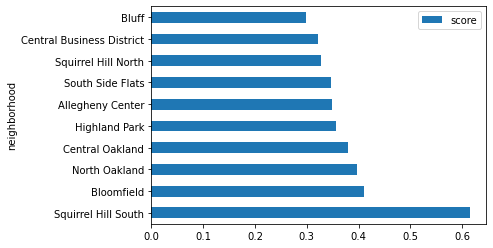

In [61]:
scaled_df[["neighborhood","score"]].sort_values("score", ascending = False).head(10).plot(x="neighborhood", y=["score"], kind="barh")


In [67]:
mapping = neighborhoods.merge(scaled_df, how='left', left_on='hood', right_on='neighborhood')

In [68]:
sns.heatmap(mapping.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

In [69]:
mapping = mapping.dropna()

In [72]:
mapping.plot(column='score', # set the data to be used for coloring
       cmap='OrRd',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "score"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

<AxesSubplot:>

# Nate 
From living in Pittsburgh for a few years I expected a neighborhood like Squirrel Hill South to win based on the factors we chose. Although squirrel hill s had one of the larger populations as well as many indicators of roads, the amount of parks and trees were so much larger than other nieghborhoods, it had to win. However, I was suprised that neighborhoods in the South Hills didn't rank higher as the nieghborhoods are very suburban and there are a decent number of parks in that area. A factor that I wish we analyzed is water sources as they are essential to the livelihood of a deer. I still think that SqHillSouth would have won even with this addition but It would have made the conclusion stronger. 